In [31]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`


import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
#from matplotlib_venn import venn2 # 

## Import data from Denmark Statistics


In [32]:
dst = pydst.Dst(lang='en')
dst.get_subjects()

tables = dst.get_tables(subjects=['04'])
tables[tables.id == 'INDKP107']
indk_vars = dst.get_variables(table_id='INDKP107')
#We look at the data to see how we can sort it.
indk_vars.values


array([['OMRÅDE', 'region', True, False, 'denmark_municipality_07',
        list([{'id': '000', 'text': 'All Denmark'}, {'id': '084', 'text': 'Region Hovedstaden'}, {'id': '01', 'text': 'Province Byen København'}, {'id': '101', 'text': 'Copenhagen'}, {'id': '147', 'text': 'Frederiksberg'}, {'id': '155', 'text': 'Dragør'}, {'id': '185', 'text': 'Tårnby'}, {'id': '02', 'text': 'Province Københavns omegn'}, {'id': '165', 'text': 'Albertslund'}, {'id': '151', 'text': 'Ballerup'}, {'id': '153', 'text': 'Brøndby'}, {'id': '157', 'text': 'Gentofte'}, {'id': '159', 'text': 'Gladsaxe'}, {'id': '161', 'text': 'Glostrup'}, {'id': '163', 'text': 'Herlev'}, {'id': '167', 'text': 'Hvidovre'}, {'id': '169', 'text': 'Høje-Taastrup'}, {'id': '183', 'text': 'Ishøj'}, {'id': '173', 'text': 'Lyngby-Taarbæk'}, {'id': '175', 'text': 'Rødovre'}, {'id': '187', 'text': 'Vallensbæk'}, {'id': '03', 'text': 'Province Nordsjælland'}, {'id': '201', 'text': 'Allerød'}, {'id': '240', 'text': 'Egedal'}, {'id': '210', 

In [33]:
#Dette er lidt pænere. Fra forelæsning 8.
indk_vars = dst.get_variables(table_id='INDKP107')
for id in ['ENHED','KOEN','UDDNIV','INDKOMSTTYPE']:
    print(id)
    values = indk_vars.loc[indk_vars.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

ENHED
 id = 101, text = People with type of income (number)
 id = 110, text = Amount of income (DKK 1.000)
 id = 116, text = Average income for all people (DKK)
 id = 121, text = Average income for people with type of income (DKK)
KOEN
 id = MOK, text = Men and women, total
 id = M, text = Men
 id = K, text = Women
UDDNIV
 id = 10, text = 10 BASIC SCHOOL 8-10 grade
 id = 26, text = 20+25 UPPER SECONDARY SCHOOL
 id = 35, text = 35 VOCATIONAL EDUCATION
 id = 40, text = 40 SHORT-CYCLE HIGHER EDUCATION
 id = 61, text = 50+60 MEDIUM-CYCLE HIGHER EDUCATION, BACHLEOR
 id = 65, text = 65 LONG-CYCLE HIGHER EDUCATION
 id = 9, text = Not stated
INDKOMSTTYPE
 id = 100, text = 1 Disposable income (2+30-31-32-35)
 id = 105, text = 2 Pre-tax Income, total (3+7+22+26+29)
 id = 110, text = 3 Primary income (4+5+6)
 id = 115, text = 4 Wages and salaries etc., total
 id = 120, text = 5 Entrepreneurial income, total
 id = 125, text = 6 Received fees subject to labour market contributions
 id = 130, text =

In [34]:
#For each year and area, we choose to look at average disposable income for people with long-cycle higher education.
inc = dst.get_data(table_id = 'INDKP107', variables= {'OMRÅDE':['*'], 'TID':['*'], 'UDDNIV':['65'],  'ENHED':['116'], 'INDKOMSTTYPE':['100']})
#... and we look at the employment rate for each year, area, and origin.
empl = dst.get_data(table_id = 'RAS200', variables={'OMRÅDE':['*'], 'TID':['*'], 'HERKOMST':['*']})

In [35]:
empl.head()


,OMRÅDE,TID,HERKOMST,ALDER,KØN,BEREGNING,INDHOLD
0,Hørsholm,2008,Descendants from non-western countries,"Age, total",Total,Employment rate,56.9
1,Hørsholm,2009,Descendants from non-western countries,"Age, total",Total,Employment rate,53.3
2,Hørsholm,2010,Descendants from non-western countries,"Age, total",Total,Employment rate,57.1
3,Høje-Taastrup,2011,Descendants,"Age, total",Total,Employment rate,55.7
4,Høje-Taastrup,2012,Descendants,"Age, total",Total,Employment rate,54.4


In [36]:
inc.head() 

,OMRÅDE,TID,UDDNIV,ENHED,INDKOMSTTYPE,KOEN,INDHOLD
0,Fanø,2013,65 LONG-CYCLE HIGHER EDUCATION,Average income for all people (DKK),1 Disposable income (2+30-31-32-35),"Men and women, total",349974
1,Varde,2013,65 LONG-CYCLE HIGHER EDUCATION,Average income for all people (DKK),1 Disposable income (2+30-31-32-35),"Men and women, total",384171
2,Vejen,2013,65 LONG-CYCLE HIGHER EDUCATION,Average income for all people (DKK),1 Disposable income (2+30-31-32-35),"Men and women, total",347954
3,Aabenraa,2013,65 LONG-CYCLE HIGHER EDUCATION,Average income for all people (DKK),1 Disposable income (2+30-31-32-35),"Men and women, total",351433
4,Fredericia,2013,65 LONG-CYCLE HIGHER EDUCATION,Average income for all people (DKK),1 Disposable income (2+30-31-32-35),"Men and women, total",397056


In [37]:
#Renaming 
columns_dict_empl = {}
columns_dict_empl['OMRÅDE'] = 'area'
columns_dict_empl['TID'] = 'year'
columns_dict_empl['HERKOMST'] = 'origin'
columns_dict_empl['INDHOLD'] = 'emp'

columns_dict_inc = {}
columns_dict_inc['OMRÅDE'] = 'area'
columns_dict_inc['TID'] = 'year'
columns_dict_inc['INDHOLD'] = 'income'
columns_dict_inc['UDDNIV'] = 'educ'

empl.rename(columns=columns_dict_empl,inplace=True)
inc.rename(columns=columns_dict_inc,inplace=True)

##Disposable income by region
I = inc.area.str.contains('Region')
inc =  inc.loc[I,['area','year','income']]
inc.head(10)

#Employment rate total by region
I = empl.area.str.contains('Region')
empl=  empl.loc[I,['area','year','origin','emp']]
empl_copy =empl



In [38]:
#From this data we pick out two different employment rates.

#Step 1: Get the total employment rate
I= empl.origin.str.contains('Total')
empl=  empl.loc[I,['area','year','emp']]

#Step 2: From the copy of empl I make the employment rate for decendents of non-western immigrants.
L = empl_copy.origin.str.contains('Descendants from non-western countries')
empl_copy=  empl_copy.loc[L,['area','year','emp']]
empl_copy.rename(columns ={'emp':'emp_nw'}, inplace=True)

#Step 3 Merge the two sets
empl_true = pd.merge(empl, empl_copy, on=['area','year'], how='left')

In [39]:
#Finally merge the income data set to the employment data.
#Looking into the data, which differs interms of range of years
print(f'Years in empl_true: {empl_true.year.unique()}')
print(f'Years in inc: {inc.year.unique()}')

#Finding the differences
diff_y = [y for y in inc.year.unique() if y not in empl_true.year.unique()] 
print(f'years in income data, but not in the employment data: {diff_y}')

#Merging
data = pd.merge(empl_true, inc, on=['area','year'], how='left')
data_true = data.sort_values(['area','year'])

Years in empl_true: [2011 2012 2013 2014 2008 2009 2010 2015 2016 2017 2018]
Years in inc: [2013 2012 2011 2010 2009 2008 2006 2005 2004 2014 2015 2007 2016 2017
 2018]
years in income data, but not in the employment data: [2006, 2005, 2004, 2007]


In [40]:
#De følgende to danner en gennemsnitlig middelindkomst over årene.
#Kode planket fra lecture 8. 
#Jeg får ikke merget det til datasættet, men det burde kunne lade sig gøre. Bør nok flyttes op. 
inc_grouped = inc.groupby('area')['income']
inc_mean = inc_grouped.mean() # mean income over years
inc_mean.head(10)

area
Region Hovedstaden    368034.600000
Region Midtjylland    334831.000000
Region Nordjylland    322216.533333
Region Sjælland       352027.533333
Region Syddanmark     336175.933333
Name: income, dtype: float64

In [41]:
inc_mean.name = 'inc_mean' # necessary for join

inc_ = inc.set_index('area').join(inc_mean, how='left')
inc_['diff'] = inc_.income - inc_.inc_mean

In [42]:
#The final dataset
data_true.head(50)

,area,year,emp,emp_nw,income
26,Region Hovedstaden,2008,75.8,65.7,317789
27,Region Hovedstaden,2009,73.3,59.7,318511
28,Region Hovedstaden,2010,72.6,57.3,371004
12,Region Hovedstaden,2011,72.5,56.2,378890
13,Region Hovedstaden,2012,72.2,55.0,388151
14,Region Hovedstaden,2013,72.3,55.5,398802
15,Region Hovedstaden,2014,72.5,55.6,411928
38,Region Hovedstaden,2015,73.2,57.7,422364
40,Region Hovedstaden,2016,73.8,58.7,411602
48,Region Hovedstaden,2017,74.4,60.5,417547


In [43]:
#Plain desriptive statistics
data_true.describe()
#Mean
data_true.groupby('area')['emp'].apply(lambda x: x.mean()).head()
data_true.groupby('area')['emp_nw'].apply(lambda x: x.mean()).head()
data_true.groupby('area')['income'].apply(lambda x: x.mean()).head()
# print (f'The income mean across all regions is {data.income.mean()}')
# print (f'The employment rate mean across all regions is {data.emp.mean()}')
# print (f'The mean employment rate amongst decendents of non-western immigrants across all regions is {data.emp_nw.mean()}')

area
Region Hovedstaden    387343.818182
Region Midtjylland    352546.000000
Region Nordjylland    338744.818182
Region Sjælland       368757.090909
Region Syddanmark     353523.727273
Name: income, dtype: float64

In [44]:
import ipywidgets as widgets
def plot_data_true(df, area): 
    I = df['area'] == area
    ax=df.loc[I,:].plot(x='year', y={'emp_nw','emp'}, style='-o', legend=False)

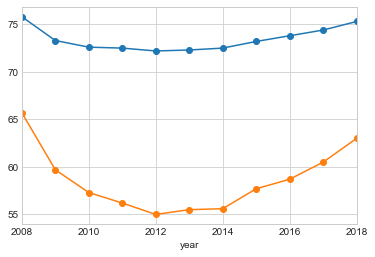

In [45]:
widgets.interact(plot_data_true, 
    df = widgets.fixed(data_true),
    area = widgets.Dropdown(description='area', 
                                    options=data.area.unique(), 
                                    value='Region Hovedstaden')
); 

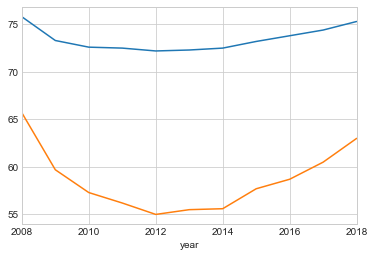

In [46]:
data_true.loc[data_true['area'] == 'Region Hovedstaden', :].plot(x='year',y={'emp_nw','emp'},legend=False);

In [47]:
#Plotting income. 
import ipywidgets as widgets
def plot_data_true(df, area): 
    I = df['area'] == area
    ax=df.loc[I,:].plot(x='year', y='income', style='-o', legend=False)

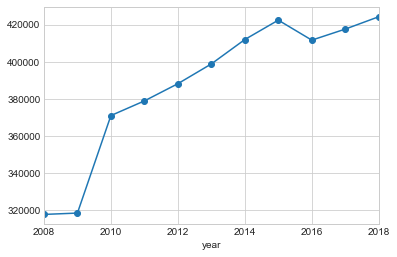

In [48]:
widgets.interact(plot_data_true, 
    df = widgets.fixed(data_true),
    area = widgets.Dropdown(description='area', 
                                    options=data.area.unique(), 
                                    value='Region Hovedstaden')
); 